
# Project: Investigate a Dataset - [European Soccer Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> You can easily find data about soccer matches but they are usually scattered across different websites. A thorough data collection and processing has been done to make your life easier in this daat base What you get:

+25,000 matches
+10,000 players
11 European Countries with their lead championship
Seasons 2008 to 2016
Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
Team line up with squad formation (X, Y coordinates)
Betting odds from up to 10 providers
Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches
tables are :
Country 
League	            foreign keys : country_id
Match	            foreign keys : country_id  ,  league_id  
Player	            
Player_Attributes	
Team	            
Team_Attributes     

### Question(s) for Analysis
which countrys have the largest number of hoe town goals ?


what is the most common speed between teams ? 


Which players had the least and max penalties?



In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import time
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [230]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas ==0.25.0

In [3]:
!pip3 install --upgrade pip

<a id='wrangling'></a>
## Data Wrangling

showing the data using head() and then seeing columns of null values and duplicated rows to decide which to be dropped


In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
country = pd.read_csv('Database_Soccer/Country.csv')
league = pd.read_csv('Database_Soccer/League.csv')
player = pd.read_csv('Database_Soccer/Player.csv')
match = pd.read_csv('Database_Soccer/Match.csv')
player_attributes = pd.read_csv('Database_Soccer/Player_Attributes.csv')
team = pd.read_csv('Database_Soccer/Team.csv')
team_attributes = pd.read_csv('Database_Soccer/Team_Attributes.csv')

seeing heads of all tables

In [5]:
for i in [country,league,player,match,player_attributes,team,team_attributes] :
  print(i.head(1))

   id     name
0   1  Belgium
   id  country_id                    name
0   1           1  Belgium Jupiler League
   id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal ...   SJA  \
0        492473              9987              9993               1 ...   4.0   

    VCH  VCD  VCA   GBH   GBD  GBA   BSH  BSD  BSA  
0  1.65  3.4  4.5  1.78  3.25  4.0  1.73  3.4  4.2  

[1 rows x 115 columns]
   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossin

seeing info of rows types and number and nulls

In [6]:
for i in [country,league,player,match,player_attributes,team,team_attributes] :
  print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

seeing null values to remove

In [7]:
for i in [country,league,player,match,player_attributes,team,team_attributes] :
  print(i.isnull().sum())

id      0
name    0
dtype: int64
id            0
country_id    0
name          0
dtype: int64
id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64
id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       18

plotting some values to see which is not necessary to remove later

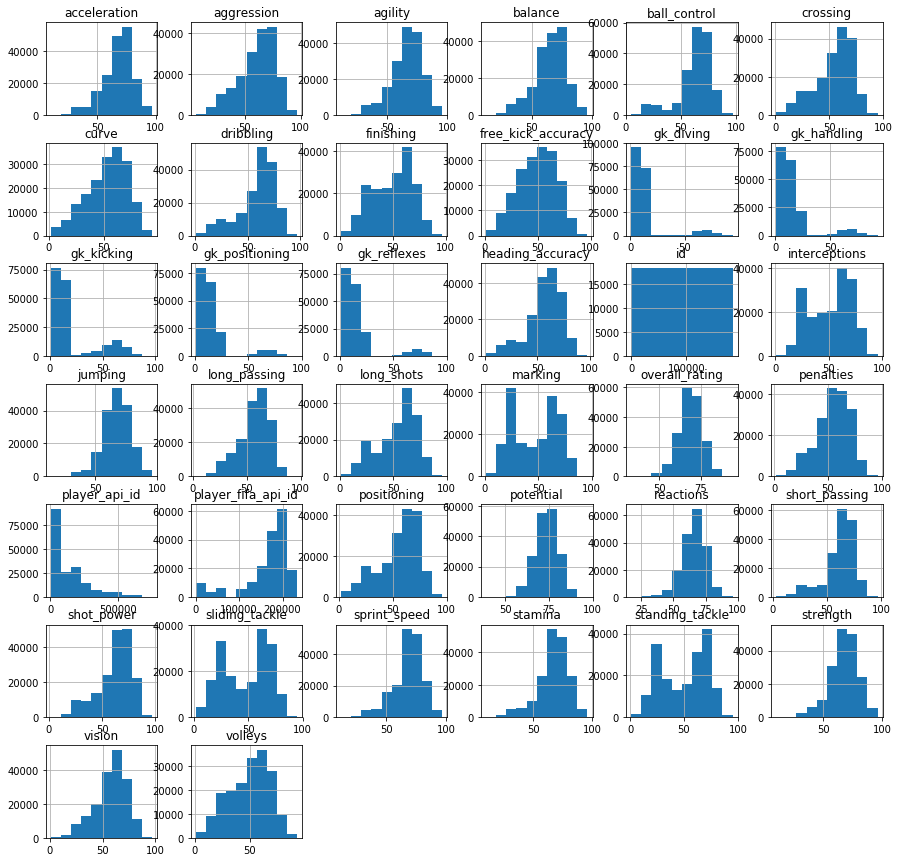

In [9]:
player_attributes.hist(figsize=(15,15));

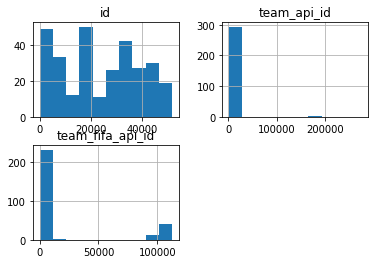

In [10]:
team.hist();

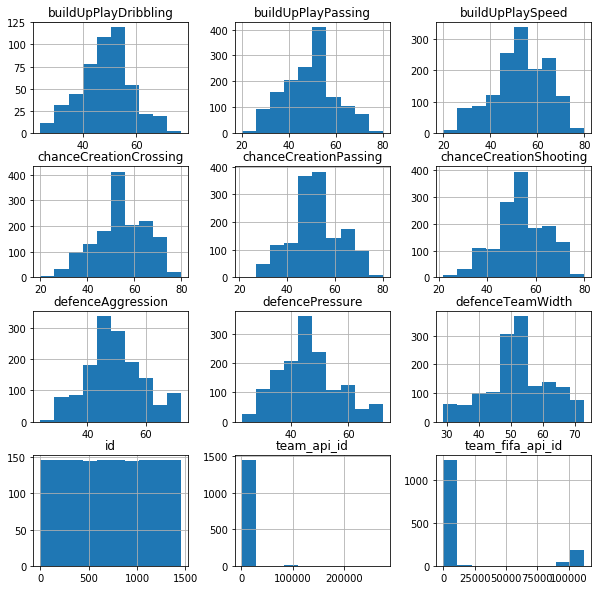

In [11]:
team_attributes.hist(figsize=(10,10));


### Data Cleaning
checking if some columns are identical to merge without them to decrease number of tables 

in first table checking for identical columns to remove

In [12]:
print(league['country_id']==country['id'])

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
dtype: bool


steps for merging country , league and match to use as a single new dataset

In [5]:
country_league = pd.merge(league,country ,how ='inner',on='id' ).copy()

putting only one column with id that is country id

In [6]:
country_league['country_id']=country['id']

In [7]:
country_league.head(1)

,id,country_id,name_x,name_y
0,1,1,Belgium Jupiler League,Belgium


renaming columns that resulted out of merging

In [8]:
country_league.rename(columns={'name_y' : 'country_name'},inplace=True)
country_league.rename(columns={'name_x' :'league_name'},inplace=True)

In [9]:
country_league_match = pd.merge(match,country_league,how='left',on=['country_id'])

seeing identical columns to remove

In [10]:
(country_league_match['country_id']==country_league_match['id_y']).describe()

count     25979
unique        1
top        True
freq      25979
dtype: object

In [11]:
country_league_match.drop(['league_id','id_y','match_api_id','home_team_api_id','away_team_api_id'],axis=1,inplace=True)

renaming id in country_league_match dataset

In [12]:
country_league_match = country_league_match.rename(columns={'id_x':'id'})

In [13]:
country_league_match.isnull().sum()

id                     0
country_id             0
season                 0
stage                  0
date                   0
home_team_goal         0
away_team_goal         0
home_player_X1      1821
home_player_X2      1821
home_player_X3      1832
home_player_X4      1832
home_player_X5      1832
home_player_X6      1832
home_player_X7      1832
home_player_X8      1832
home_player_X9      1832
home_player_X10     1832
home_player_X11     1832
away_player_X1      1832
away_player_X2      1832
away_player_X3      1832
away_player_X4      1832
away_player_X5      1832
away_player_X6      1832
away_player_X7      1832
away_player_X8      1832
away_player_X9      1833
away_player_X10     1833
away_player_X11     1839
home_player_Y1      1821
                   ...  
B365A               3387
BWH                 3404
BWD                 3404
BWA                 3404
IWH                 3459
IWD                 3459
IWA                 3459
LBH                 3423
LBD                 3423


dropping all nans as i won't need them in my questions

In [14]:
country_league_match.dropna(inplace=True)

dropping all columns i won't need in my conclusion

In [15]:
country_league_match.drop(country_league_match.loc[:, 'home_player_X1':'away_player_11'], inplace = True, axis = 1)

In [16]:
country_league_match.drop(country_league_match.loc[:,'B365H':'BSA'], inplace = True, axis = 1)

In [17]:
country_league_match.drop(country_league_match.loc[:,'goal':'possession'],axis=1,inplace=True)

mearging team with team attributes and cleaning them

In [18]:
teams=pd.merge(team_attributes,team,how='right',on=['team_api_id'])

In [19]:
teams.head()

,id_x,team_fifa_api_id_x,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,id_y,team_fifa_api_id_y,team_long_name,team_short_name
0,1.0,434.0,9930,2010-02-22 00:00:00,60.0,Balanced,NaN,Little,50.0,Mixed,...,Medium,55.0,Press,45.0,Normal,Cover,49119,434.0,FC Aarau,AAR
1,2.0,434.0,9930,2014-09-19 00:00:00,52.0,Balanced,48.0,Normal,56.0,Mixed,...,Medium,44.0,Press,54.0,Normal,Cover,49119,434.0,FC Aarau,AAR
2,3.0,434.0,9930,2015-09-10 00:00:00,47.0,Balanced,41.0,Normal,54.0,Mixed,...,Medium,44.0,Press,54.0,Normal,Cover,49119,434.0,FC Aarau,AAR
3,4.0,77.0,8485,2010-02-22 00:00:00,70.0,Fast,NaN,Little,70.0,Long,...,Medium,70.0,Double,70.0,Wide,Cover,39393,77.0,Aberdeen,ABE
4,5.0,77.0,8485,2011-02-22 00:00:00,47.0,Balanced,NaN,Little,52.0,Mixed,...,Medium,47.0,Press,52.0,Normal,Cover,39393,77.0,Aberdeen,ABE


In [20]:
teams.drop(['team_fifa_api_id_x','id_x','team_fifa_api_id_y','id_y','buildUpPlayDribbling'],axis=1,inplace=True)

In [21]:
teams.dropna(inplace=True)

merging players and player_attributes to get relation between player and penalties

In [22]:
player_attributes.drop(['player_fifa_api_id','sliding_tackle','gk_diving','gk_handling','gk_kicking','gk_positioning','marking','standing_tackle','gk_reflexes'],axis=1,inplace=True)

In [23]:
player_attributes.isnull().sum()

id                        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
dtype: int64

dropping columns with nan values

In [24]:
player_attributes.drop(['attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power'],axis=1,inplace=True)

In [25]:
players = pd.merge(player,player_attributes,how='right',on=['player_api_id'])

In [26]:
players.head()

,id_x,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id_y,date,overall_rating,...,preferred_foot,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,2016-02-18 00:00:00,67.0,...,right,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,2015-11-19 00:00:00,67.0,...,right,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,2015-09-21 00:00:00,62.0,...,right,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,2015-03-20 00:00:00,61.0,...,right,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,2007-02-22 00:00:00,61.0,...,right,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0


In [27]:
players.dropna(inplace=True)

 <a id='eda'></a>
## Exploratory Data Analysis
 <a id='eda'></a>
### which countrys have the largest number of home town goals ?

Making a plotting function to reduce repetition that takes the dataset number and and two column names
to groupby, that are sent to it as a string

In [33]:
def plotting(x,y,z):
   x.groupby(y)[z].count().plot(kind='bar',width=.5 , alpha=1);

inspecting country_league_match dataset to get the country with highest number of goals

In [34]:
country_league_match.head(3)

,id,country_id,season,stage,date,home_team_goal,away_team_goal,league_name,country_name
3248,3249,1729,2012/2013,1,2012-08-18 00:00:00,0,0,England Premier League,England
3249,3250,1729,2012/2013,1,2012-08-20 00:00:00,1,0,England Premier League,England
3250,3251,1729,2012/2013,1,2012-08-18 00:00:00,5,0,England Premier League,England


### Finding
plotting relation between home team goals and country and as shown England has 
the highest number of home team goals and Spain and Italy has the same number of goals 
and Germany has the lowest number 

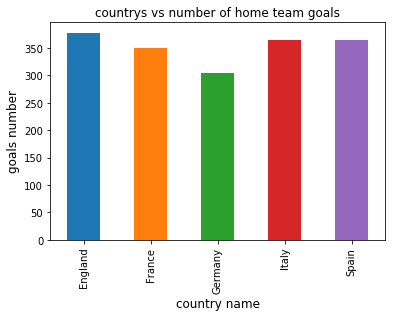

In [35]:
plotting(country_league_match,'country_name','home_team_goal')
plt.title('countrys vs number of home team goals');
plt.xlabel('country name',fontsize=12);
plt.ylabel('goals number',fontsize=12);
sns.set_style('darkgrid')

### Finding
plotting relation between team goals and country and as shown England has 
the highest number of away team goals and Spain and Italy has the same number of goals 
and Germany has the lowest number 

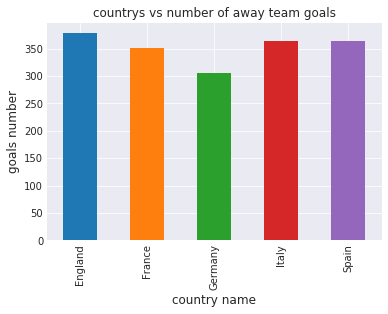

In [37]:
plotting(country_league_match,'country_name','away_team_goal')
plt.title('countrys vs number of away team goals');
plt.xlabel('country name',fontsize=12);
plt.ylabel('goals number',fontsize=12);
sns.set_style('darkgrid')

### Finding
It seems that goals are max in England and min in Germany due to number of matches they went 
into not beacaues of talent or any else

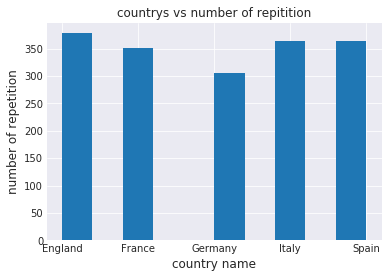

In [38]:
country_league_match['country_name'].hist();
plt.title('countrys vs number of repitition');
plt.xlabel('country name',fontsize=12);
plt.ylabel('number of repetition',fontsize=12);

### Finding
Germany is the lowest in matches that has been through and the has lowest goals and England has the max
Spain and Italy have the same number of matches

### what is the most common speed between teams?

### Finding
As shown balanced speed is the most common between teams after plotting teams speed against number of team

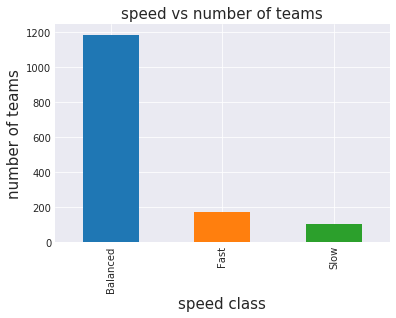

In [39]:
plotting(teams,'buildUpPlaySpeedClass','team_long_name')
plt.title('speed vs number of teams',fontsize=15);
plt.xlabel('speed class',fontsize=15);
plt.ylabel('number of teams',fontsize=15);

### Finding
As observed from the graph there is a big difference between teams of balanced speed and of slow and fast speed

### Who are players with least and max penalties ?

In [38]:
players['penalties'].describe()

count    181265.000000
mean         54.935950
std          15.558855
min           2.000000
25%          45.000000
50%          57.000000
75%          67.000000
max          96.000000
Name: penalties, dtype: float64

cutting penalties values into a group of four values to determine penalties ratio

In [10]:
penalties=[ 2.000000,45.000000,57.000000,67.000000,96.000000]
bins = ['low','medium','high','max']
players['penalties_level'] = pd.cut(players['penalties'],penalties,labels=bins)

plotting the grouped data after sorting them to get the lowest value

Text(0,0.5,'number of repetitin')

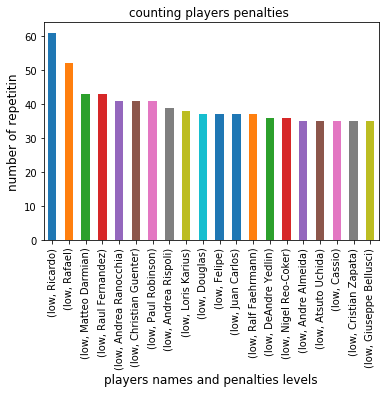

In [20]:
players.sort_values(by='penalties_level',ascending=False).groupby('penalties_level')['player_name'].value_counts()[0:20].plot(kind='bar');
plt.title('counting players penalties ',fontsize=(12));
plt.xlabel('players names and penalties levels',fontsize=(12));
plt.ylabel('number of repetitin',fontsize=(12));

### Finding
So the least player to have penalties is Ricardo and most players with low penalties

have close values of penalties number of times

getting max value of each section of the groupedby data 

In [46]:
players.groupby('penalties_level')['player_name'].agg(lambda x:x.value_counts().index[0])

penalties_level
low              Ricardo
medium         Guilherme
high      Moussa Dembele
max        Alessio Cerci
Name: player_name, dtype: object

### Finding
The player with max penalty is Alessio Cerci and min penalty is Ricardo and as shown most players have low penalties

# conclusions
Team goals in countrys dont differ because of the teams lacking  but because of number of matches countrys went into

so we can make additional research on more countrys with small number of matches to participate in to get better results .

Least player to get penalties is Ricardo and the player with max penalty is Alessio Cerci and at least half

of players get penalties higher than the average .

The most common speed between player is balanced speed and there is a big difference between teams of balanced speed and of 

slow and fast speed so i think further research would be better on the relation between player speed and team goals .

# limitations
Huge number of columns and data that is from the original dataset that made it difficult in the cropped dataset to explore and 

clean  like all columns with name of api_id and many rows with nan values 

Also the distribution of the data between multiple tables needed aditional time to merge the data to be able to explore it 

easily and foreign and primary keys in these tables weren't very clear


In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0